In [1]:
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

C:\Users\Sona\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# mean=45,sd=6,time=3 years 1 month   days
dem=random.normal(loc=45,scale=6,size=(1125,1))
dem1=list(map(int,dem))
dem1=np.array(dem1)
dem1.shape

C:\Users\Sona\AppData\Local\Temp/ipykernel_10468/2471140536.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dem1=list(map(int,dem))


(1125,)

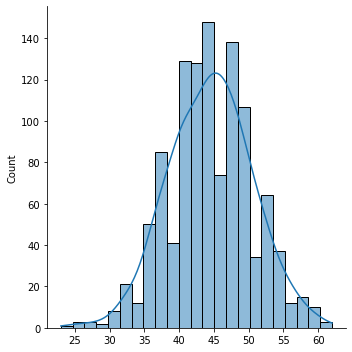

In [3]:
%matplotlib inline
sns.displot(dem1,kde=True)

In [4]:
prd=[45,45,45]
ed=[45,45,45]
prd[1],prd[2]=int(math.ceil((dem1[0]+dem1[1])/2)),int(math.ceil((dem1[0]+dem1[1]+dem1[2])/3))

In [5]:
for i in range(3,len(dem1)):
    prd.append(int(math.ceil((dem1[i]+dem1[i-1]+dem1[i-2])/3)))
    ed.append(int(math.ceil((dem1[i]+dem1[i-1]+dem1[i-2])/3)))

In [6]:
day=[i for i in range(1,len(dem1)+1)]

In [7]:
fn=lambda a,b:a-b if a-b>0 else 0

In [8]:
tot_d=[dem1[0]]
tot_q=[prd[0]]
end_inv=[fn(tot_q[0],tot_d[0])]
shrt=[fn(tot_d[0],tot_q[0])]

In [9]:
for i in range(1,len(dem1)):
    tot_d.append(dem1[i]+shrt[i-1])
    prd[i]=prd[i]-end_inv[i-1]+0####
    #prd[i]=prd[i]-end_inv[i-1]+3# +3 extra production than estimated demand to reduce backorders
    tot_q.append(prd[i]+end_inv[i-1])
    if tot_q[i]>50:# distribution capacity is 50
        shrt.append(fn(tot_d[i],50))
        if tot_d[i]>50:
            u=tot_q[i]-50
        else:
            u=tot_q[i]-tot_d[i]
        end_inv.append(u)
    else:
        end_inv.append(fn(tot_q[i],tot_d[i]))
        shrt.append(fn(tot_d[i],tot_q[i]))

In [10]:
d={"Day":day,"estimated_demand":ed,"Production_Quantity":prd,"Quantity_available":tot_q,"Daily_Demand":dem1,"Demand_with_Backorders":tot_d}

In [11]:
df=pd.DataFrame(d)

In [12]:
df.tail()

,Day,estimated_demand,Production_Quantity,Quantity_available,Daily_Demand,Demand_with_Backorders
1120,1121,45,45,45,43,52
1121,1122,46,46,46,43,50
1122,1123,44,44,44,45,49
1123,1124,42,42,42,38,43
1124,1125,42,42,42,43,44


In [13]:
df.shape

(1125, 6)

In [14]:
#df["estimated_demand"]=ed
df["End_Inventory"]=end_inv
df["inventory_Carrying_Cost"]=df["End_Inventory"]*5
df["Backorders"]=shrt
df["backorder_Cost"]=df["Backorders"]*10

In [15]:
df["Backordered"]=df.Backorders.apply(lambda x:0 if x==0 else 1)

In [16]:
df.tail()

,Day,estimated_demand,Production_Quantity,Quantity_available,Daily_Demand,Demand_with_Backorders,End_Inventory,inventory_Carrying_Cost,Backorders,backorder_Cost,Backordered
1120,1121,45,45,45,43,52,0,0,7,70,1
1121,1122,46,46,46,43,50,0,0,4,40,1
1122,1123,44,44,44,45,49,0,0,5,50,1
1123,1124,42,42,42,38,43,0,0,1,10,1
1124,1125,42,42,42,43,44,0,0,2,20,1


In [49]:
df.shape

(1125, 11)

In [50]:
u=list(df["Backorders"])
v=[0]
for i in range(len(u)-1):
    v.append(u[i])
df["backorder_demand"]=v

In [51]:
df5=df.loc[:,["Day","estimated_demand","backorder_demand","Production_Quantity","Quantity_available","Daily_Demand","Demand_with_Backorders","End_Inventory","inventory_Carrying_Cost","Backorders","backorder_Cost","Backordered"]]

In [52]:
#df5.to_csv('back_0.csv',index=False)# importing file as csv file

In [53]:
df = df.rename(columns={'Shortag_Cost':'backorder_cost'})

In [54]:
df.tail()

,Day,estimated_demand,Production_Quantity,Quantity_available,Daily_Demand,Demand_with_Backorders,End_Inventory,inventory_Carrying_Cost,Backorders,backorder_Cost,Backordered,backorder_demand
1120,1121,43,43,43,38,42,1,5,0,0,0,4
1121,1122,42,41,42,47,47,0,0,5,50,1,0
1122,1123,42,42,42,40,45,0,0,3,30,1,5
1123,1124,44,44,44,43,46,0,0,2,20,1,3
1124,1125,43,43,43,44,46,0,0,3,30,1,2


In [55]:
arr1=[0,1,2,3,4,5,6,7,8,9,10]# extra production
arr2=[712365,397310,332970,325115,346015,371735,422080,466010,500055,561225,612855]# total costs

Text(0, 0.5, 'Total cost')

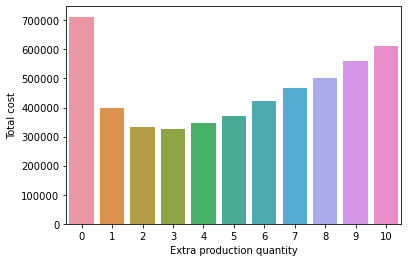

In [56]:
sns.barplot(x=arr1,y=arr2)
plt.xlabel("Extra production quantity")
plt.ylabel("Total cost")
# extra production 3 got least total cost